# Desafío - Expansiones basales.
### Nombre: Thomas Peet, Braulio Aguila, Camilo Ramírez
### Generación: G47
### Profesores: Alfonso Tobar - Sebastián Ulloa
### Fecha: 21-08-2022

### Descripción  

- Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.  
- Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.  
-  Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva  

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe los módulos clásicos del trabajo en ciencia de datos.
- El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere estadísticas descriptivas.  
- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la  
librería pyGAM.  

In [1]:
#Se importan los módulos de trabajo:

# Modulos básicos
import pickle, sys

# utils propios
import helpers as hp

# Modulo básicos de datascience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-procesamiento
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper

# Modelamiento
from sklearn.model_selection import train_test_split
from pygam import GAM, LinearGAM
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

# librería para análisis exploratorio
from pandas_profiling import ProfileReport

In [2]:
# Se carga la data y se hace una exploración preliminar de los datos
df = pd.read_csv('compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

>>#### Comentario
Se observa que la base contiene 9 columnas (8 predictores y 1 variable objetivo). Todos las variables son de tipo numéricos y ninguna presenta nulos.

### Ejercicio 2: Descripción
- El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals)  
- Los nombres de las variables son muy poco amigables, dado que contienen  
espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.  
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decide si es necesario normalizarlos/escalarlos.  

In [4]:
## Se renombran las variables según indicación del enunciado:
rename_variables = {
    "Cement (component 1)(kg in a m^3 mixture)": "cemento",
    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)" : "blast_furnace_slag",
    "Fly Ash (component 3)(kg in a m^3 mixture)" : "ceniza_volatil",
    "Water  (component 4)(kg in a m^3 mixture)": "agua",
    "Superplasticizer (component 5)(kg in a m^3 mixture)" : "superplasticidad",
    "Coarse Aggregate  (component 6)(kg in a m^3 mixture)" : "agregado_grueso",
    "Fine Aggregate (component 7)(kg in a m^3 mixture)" : "agregado_fino",
    "Age (day)" : "edad",
    "Concrete compressive strength(MPa, megapascals) " : "concrete_compressive_strength",
}
df.rename(columns=rename_variables, inplace=True)

In [5]:
#Inspección de los datos, vector objetivo (concrete compressive strength) y variables predictoras:
hp.describe_variables(df)

------------------------------------------------------------
-------------------Variables Categóricas--------------------
------------------------------------------------------------
------------------------------------------------------------
-------------------Variables Numéricas----------------------
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
cemento,1030.0,281.2,104.5,102.0,192.4,272.9,350.0,540.0
blast_furnace_slag,1030.0,73.9,86.3,0.0,0.0,22.0,142.9,359.4
ceniza_volatil,1030.0,54.2,64.0,0.0,0.0,0.0,118.3,200.1
agua,1030.0,181.6,21.4,121.8,164.9,185.0,192.0,247.0
superplasticidad,1030.0,6.2,6.0,0.0,0.0,6.4,10.2,32.2
agregado_grueso,1030.0,972.9,77.8,801.0,932.0,968.0,1029.4,1145.0
agregado_fino,1030.0,773.6,80.2,594.0,731.0,779.5,824.0,992.6
edad,1030.0,45.7,63.2,1.0,7.0,28.0,56.0,365.0
concrete_compressive_strength,1030.0,35.8,16.7,2.3,23.7,34.4,46.1,82.6


In [6]:
# Hacemos un análisis exploratorio de las variables:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe()

In [7]:
df.drop(columns = ['agua'], inplace=True)

>>#### Comentario

Se retira la variable "agua", debido a su alta correlación

Al inspeccionar las variables, es posible ver que se trata de variables númericas, tanto el vector objetivo como las varibles predictoras, por lo que la problemática    
se puede resolver a través de una modelación por **regresión lineal**. Asimismo, al ser variables númericas se procede a escalar. No será necesario aplicar encoding ni imputar por lo anteriormente mencionado.

In [8]:
# Antes de escalar, se separa la data:
X = df.drop(columns = ["concrete_compressive_strength"])
y = df.concrete_compressive_strength
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
# Escalamiento de las variables numéricas.
sc = SklearnTransformerWrapper(transformer = StandardScaler(), variables = X_train.columns.to_list())

# Se entrena el transformer de escalamiento usando solo la data de entrenamiento.
sc.fit(X_train,y_train)

# Luego, se aplica el escalamiento tanto en set de entrenamiento como test.
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Ejercicio 3: Modelo    
- En base al vector objetivo, decida el mejor modelo e importe con pygam. Condicional a esto, importe las métricas de desempeño asociadas.      
- Genere conjuntos de entrenamiento y validación.     
- Genere un primer modelo sin implementar la función gridsearch. Reporte el hiperparámetro lam así como las métricas de desempeño asociadas.      
- Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de desempeño.    

>>#### Comentario
Como se indico anteriormente, el vector es objetivo es númerico al igual que las variables predictoras, por lo tanto se va a utilizar un modelo aditivo generalizado
lineal (LinearGAM).

In [10]:
# Modelo sin regularización
gam_sin_reg = LinearGAM(fit_intercept=True).fit(X_train, y_train)

>>#### Comentario

Se ejecutó un entrenamiento de un modelo LinearGAM con grid search en un espacio de lambdas de `np.logspace(-3,3,5)` para una data de 7 variables lo que implica que hay que buscar entre 5^7 modelos. Este proceso tomo un total de 527 minutos para encontrar el óptimo. Para no repetir el proceso guardamos el modelo en un archivo externo llamado `gam_model_lambda_3_3_5` que se carga en la celda siguiente.

In [11]:
cargar_modelo_entrenado_anteriormente = True

if cargar_modelo_entrenado_anteriormente:
    nombre_modelo_a_cargar = 'gam_model_lambda_3_3_5'
    gam = hp.load_bytes_variable(nombre_modelo_a_cargar)['model']
else:
    # Modelo con regularización
    gam = LinearGAM(fit_intercept=True)

    # Definición espacio de búsqueda para la regularización
    lam = np.logspace(-3,3,4) # Más de 4 para la división del logspace resulta en una búsqueda muy exhaustiva y probablemente tome mucho tiempo
    lams = [lam] * len(X_train.columns)

    # Entrenamiento y regularización del modelo LinearGAM
    gam.gridsearch(X_train.values, y_train.values, lam=lams, progress=False)

gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     82.4444
Link Function:                     IdentityLink Log Likelihood:                                 -3039.3444
Number of Samples:                          721 AIC:                                             6245.5776
                                                AICc:                                            6267.7168
                                                GCV:                                               33.3592
                                                Scale:                                             26.5719
                                                Pseudo R-Squared:                                   0.9165
Feature Function                  Lam

C:\Users\tomas\AppData\Local\Temp\ipykernel_2620\1864184026.py:18: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [21]:
print('Lambdas (modelo lgam_3_3_5)')
gam.lam
variables = ['cemento', 'blast_furnace_slag', 'ceniza_volatil', 'superplasticidad', 'agregado_grueso', 'agregado_fino', 'edad']
for l,v in zip(gam.lam, variables):
    print(f'λ {v} : {l[0].round(3)}')

Lambdas (modelo lgam_3_3_5)
λ cemento : 1.0
λ blast_furnace_slag : 1.0
λ ceniza_volatil : 0.032
λ superplasticidad : 0.032
λ agregado_grueso : 1.0
λ agregado_fino : 0.032
λ edad : 0.001


>>#### Comentario

Estos son los $\lambda$ que se obtuvieron luego de hacer la búsqueda exhaustiva sobre el espacio de $\lambda$ definido previamente. Hay que tener en cuenta que aunque el tiempo de procesamiento es relativamente alto para esta búsqueda, este conjunto de $\lambda$ es bastante limitado. Al aumentar la *división del espacio de búsqueda*, aumenta exponencialmente el tiempo de procesamiento volviendolo inviable o a lo menos muy costoso computacionalmente. 

Como ejemplo, tomemos el caso de dividir el espacio de búsqueda de los $\lambda$ en $3$ para cada variable. Si tenemos $8$ variables, esto significa que en total tendrá que entrenar $3^8$($6561$) modelos distintos y elegir el mejor. Si aumentamos la *división del espacio de búsqueda* a $4$ el número de modelos crece a $4^8$ ($65536$) o con $5$, $5^8$ ($390625$). Por esta razón práctica se decidió dejar en el archivo este número fijado en $3$. Sin embargo, se ejecutó el proceso de grid search para $5$ divisiones de búsqueda lo que tomo aproximadamente 527 minutos, y se guardo dicho modelo en un archivo binario (`gam_model_3_3_5`).

Observando los $\lambda$ obtenidos para este modelo se identifica que hay 3 variables con mayor relevancia, 3 variables con relevancia intermedia y 1 que fue descartada. Es necesario aclarar que los valores obtenidos son en base a muestreo muy acotado para $\lambda$. Esto implica que el nivel de detalle con el que se determina el valor de $\lambda$ es muy bajo.

In [16]:
metrics = {
        'r2_score': r2_score,
        # 'rmse_val': lambda x,y: np.sqrt(mean_squared_error(x,y)),
        # 'mae_val': median_absolute_error
    }

gam_scores = hp.report_regression_metrics(gam, X_test, y_test, metrics)
gam_sin_reg_scores = hp.report_regression_metrics(gam_sin_reg, X_test, y_test, metrics)

models = {'gam':gam_scores,'gam_sin_reg':gam_sin_reg_scores}

# Tabla de reporte de performance
hp.reporte_modelos(models)

Models,r2_score
gam,0.8590
gam_sin_reg,0.8550


>>#### Comentario

De acuerdo con las métricas reportadas en la tabla anterior, se elige el modelo regularizado (gam) como el mejor modelo, ya que evidencia una mejor performance en cuanto a la métrica que escogimos  
($R^2$) que el modelo sin regularizar.

![im1](img1.jpg)

Esta figura esquematiza una interpretación de lo que podría estar ocurriendo según los resultados obtenidos

### Ejercicio 4: Dependencia Parcial
- En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
- Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
- Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

In [13]:
#Para evaluar el comportamiento de la dependencia parcial de cada atributo se utiliza una función que utilice como parametro el modelo:
plt.rcParams["figure.figsize"] = (20,8)
def grilla_gam(modelo):
    attribute = X_train.columns
    terminos = list(zip(attribute,modelo.terms[0:len(modelo.terms)-1]))
    cols = 2; rows = int(len(attribute) / cols)+1
    for i, term in enumerate(terminos):
        plt.subplot(rows,cols,i+1)
        x_grid = modelo.generate_X_grid(term=i)
        partial_dep,confidence_intervals = modelo.partial_dependence(term=i, X=x_grid, width=0.95)
        plt.plot(x_grid[:, term[1].feature], partial_dep)
        plt.plot(x_grid[:, term[1].feature], confidence_intervals, c="r", ls="--")
        plt.scatter(X_train[term[0]], [0] *
                    len(X_train[term[0]]), marker='|', alpha=.5)
        plt.title(repr(term[0]))
    plt.tight_layout()

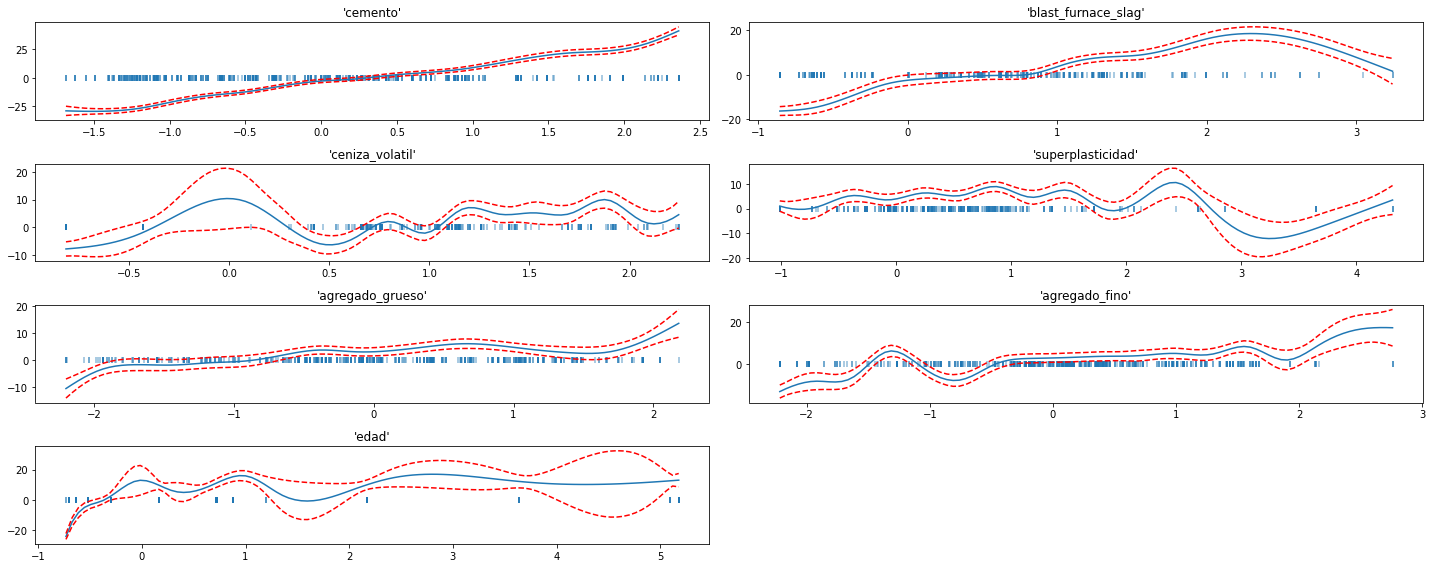

In [14]:
#Evaluamos el modelo elegido anteriormente para visualizar cada uno de los atributos predictores:
grilla_gam(gam)

>>#### Comentario

Recordar que las funciones obtenidas aportan aditivamente a la variable a estimar

$$ y = f_1(cemento) + f_2 (blast\_furnace\_slag) + ... + f_7(agregado\_fino) $$

Primeramente observamos que la función que se ajustó para la variable `cemento` directa y ascendente con la variable objetivo. Esto quiere decir que a medida que la mezcla contiene mayor cantidad de `cemento`, probablemente tenga una mayor resistencia.

Distinto es el caso de la variable `superplasticidad` ya que la tendencia de la función obtenida es oscilatoria por lo que no podemos sacar conclusiones del todo claras.

Las variables de `agregado_grueso`y `agregado_fino` presentan una función de tendencia similar, en donde no hay mucha diferencia en su aporte a la variable objetivo `concrete_compressive_strength` (Fuerza de compresión).

En el caso de la variable `edad` podemos observar que los intervalos de confianza obtenidos en distintas partes de la curva tienden a ser mas o menos dispersos. Esto implica que para esta variable no podemos aseverar una aporte positivo o negativo a la variable objetivo.